<a href="https://colab.research.google.com/github/perigor/AnalisePreditiva-ManutencaoCompressor/blob/main/analisepreditiva_manutencaocompressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* id =
* rpm = Rotações por minuto
* motor_power = Potência do motor (W)
*torque = Força
*outlet_pressure_bar = Pressão de saída (bar)
*air_flow = fluxo de ar (L/Min ou Pés)
*noise_db = ruído
*outlet_temp = Temperatura de saída
*wpump_outlet_press = Pressão de Saida (bomba do sist de refrigeração)
*water_inlet_temp = Temperatura de entrada de água
*water_outlet_temp = Temperatura de saída de água
*wpump_power = Potência da bomba de água do sist. de *refrigeração
*water_flow = Fluxo de água
*oilpump_power = Potência da Bomba de Óleo
*oil_tank_temp =  Temperatura do Tanque de óleo
*gaccx = Aceleração do solo (m/s²)
*gaccy = Aceleração do solo  (m/s²)
*gaccz = Aceleração do solo (m/s²)
*haccx = Aceleração da cabeça (m/s²)
*haccy = Aceleração da cabeça (m/s²)
*haccz = Aceleração da cabeça (m/s²)
*bearings = Rolamentos
*wpump = Bomba de refrigeração
*radiator = Radiador
*exvalve = Valvula de alívio
*acmotor = Motor AC

In [ ]:
# Importando bibliotecas.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importando dados.

df = pd.read_csv('/content/data.csv')

df.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,...,0.383773,2.649801,1.213344,1.409218,2.962484,Ok,Ok,Clean,Clean,Stable
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,...,0.450954,2.669423,1.210674,1.379050,2.938135,Ok,Ok,Clean,Clean,Stable
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,...,0.443924,2.772009,1.210612,1.373490,2.991878,Ok,Ok,Clean,Clean,Stable
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,...,0.370457,2.876056,1.213223,1.443234,3.096158,Ok,Ok,Clean,Clean,Stable
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,...,0.383868,2.849451,1.209216,1.405190,3.059417,Ok,Ok,Clean,Clean,Stable


In [ ]:
# Visualizando linhas e colunas.

df.shape

(1000, 26)

In [ ]:
# Visualizando colunas do df.

df.columns

Index(['id', 'rpm', 'motor_power', 'torque', 'outlet_pressure_bar', 'air_flow',
       'noise_db', 'outlet_temp', 'wpump_outlet_press', 'water_inlet_temp',
       'water_outlet_temp', 'wpump_power', 'water_flow', 'oilpump_power',
       'oil_tank_temp', 'gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz',
       'bearings', 'wpump', 'radiator', 'exvalve', 'acmotor'],
      dtype='object')

In [ ]:
# Verificando Dtypes.

tipos_de_dados = df.dtypes
print(tipos_de_dados)

id                       int64
rpm                      int64
motor_power            float64
torque                 float64
outlet_pressure_bar    float64
air_flow               float64
noise_db               float64
outlet_temp            float64
wpump_outlet_press     float64
water_inlet_temp       float64
water_outlet_temp      float64
wpump_power            float64
water_flow             float64
oilpump_power          float64
oil_tank_temp          float64
gaccx                  float64
gaccy                  float64
gaccz                  float64
haccx                  float64
haccy                  float64
haccz                  float64
bearings                object
wpump                   object
radiator                object
exvalve                 object
acmotor                 object
dtype: object


In [ ]:
# Verificando dados nulos

print(df.isnull().sum())

id                     0
rpm                    0
motor_power            0
torque                 0
outlet_pressure_bar    0
air_flow               0
noise_db               0
outlet_temp            0
wpump_outlet_press     0
water_inlet_temp       0
water_outlet_temp      0
wpump_power            0
water_flow             0
oilpump_power          0
oil_tank_temp          0
gaccx                  0
gaccy                  0
gaccz                  0
haccx                  0
haccy                  0
haccz                  0
bearings               0
wpump                  0
radiator               0
exvalve                0
acmotor                0
dtype: int64


In [ ]:
# Verificando se há valores duplicados.

df.duplicated().sum()

0

#Desempenho do Motor:

Existe uma correlação entre a rotação por minuto (rpm) e a potência do motor?

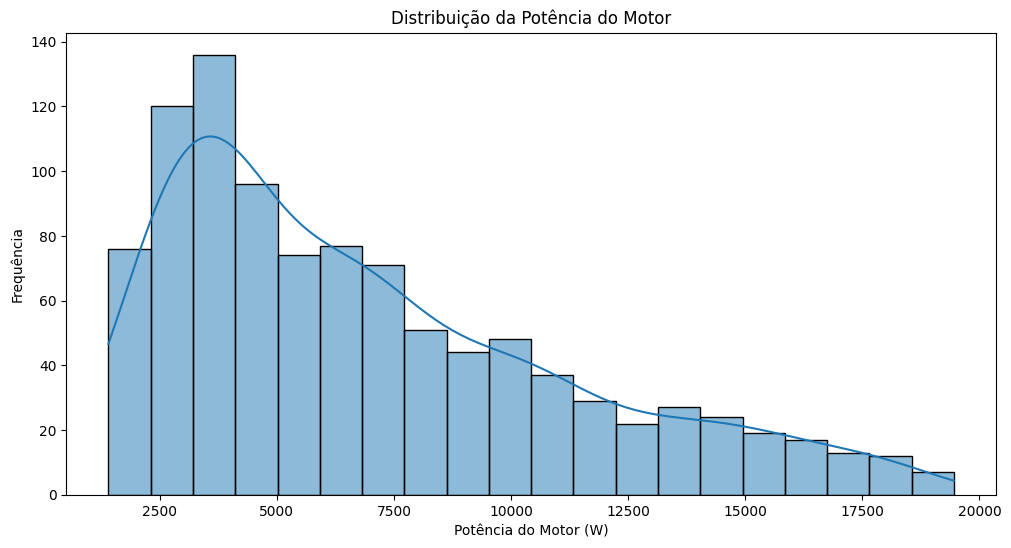

In [ ]:
# Distribuição da Potência do Motor.

plt.figure(figsize=(12, 6))
sns.histplot(df['motor_power'], bins=20, kde=True)
plt.title('Distribuição da Potência do Motor')
plt.xlabel('Potência do Motor (W)')
plt.ylabel('Frequência')
plt.show()

O histograma é uma representação gráfica da distribuição dos dados. O eixo x representa os valores da potência do motor, divididos em 20 intervalos (bins), e o eixo y representa a frequência de ocorrência de valores dentro desses intervalos. O parâmetro kde=True adiciona uma estimativa da função de densidade de kernel para suavizar a visualização. Este gráfico permite entender como os valores de potência do motor estão distribuídos e identificar possíveis padrões.

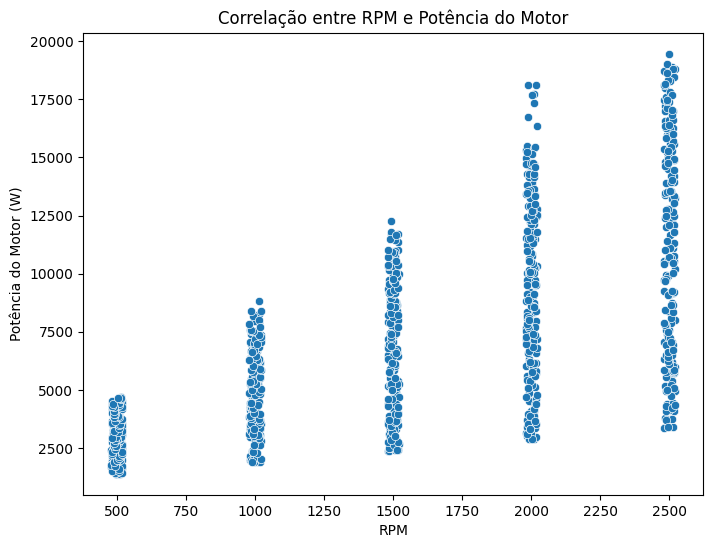

In [ ]:
# Correlação entre RPM e Potência do Motor.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='rpm', y='motor_power', data=df)
plt.title('Correlação entre RPM e Potência do Motor')
plt.xlabel('RPM')
plt.ylabel('Potência do Motor (W)')
plt.show()

O gráfico de dispersão (scatter plot) serve para explorar a relação entre RPM (rotação por minuto) e a potência do motor. Cada ponto no gráfico representa uma observação no conjunto de dados, onde a posição horizontal (eixo x) representa o RPM e a posição vertical (eixo y) representa a potência do motor. Este gráfico ajuda a visualizar se há uma tendência ou padrão evidente entre essas duas variáveis.

In [ ]:
# Calcule a correlação entre RPM e Potência do Motor.

correlacao_rpm_motor = df['rpm'].corr(df['motor_power'])
print(f"Correlação entre RPM e Potência do Motor: {correlacao_rpm_motor}")

Correlação entre RPM e Potência do Motor: 0.6830169502967909


Aqui, estamos calculando a correlação entre as colunas 'rpm' e 'motor_power' usando o método corr() do Pandas. A correlação é uma medida estatística que indica a força e a direção da relação linear entre duas variáveis. O valor impresso representa a correlação entre o RPM e a potência do motor. Se for próximo de 1, há uma forte correlação positiva (à medida que o RPM aumenta, a potência do motor também aumenta); se for próximo de -1, há uma forte correlação negativa (à medida que o RPM aumenta, a potência do motor diminui); se for próximo de 0, há uma correlação fraca ou nula.

#Condição da Água de Refrigeração:

* Como as temperaturas de entrada e saída da água variam?
* Existe uma relação entre o fluxo de água (water_flow) e a temperatura da água?

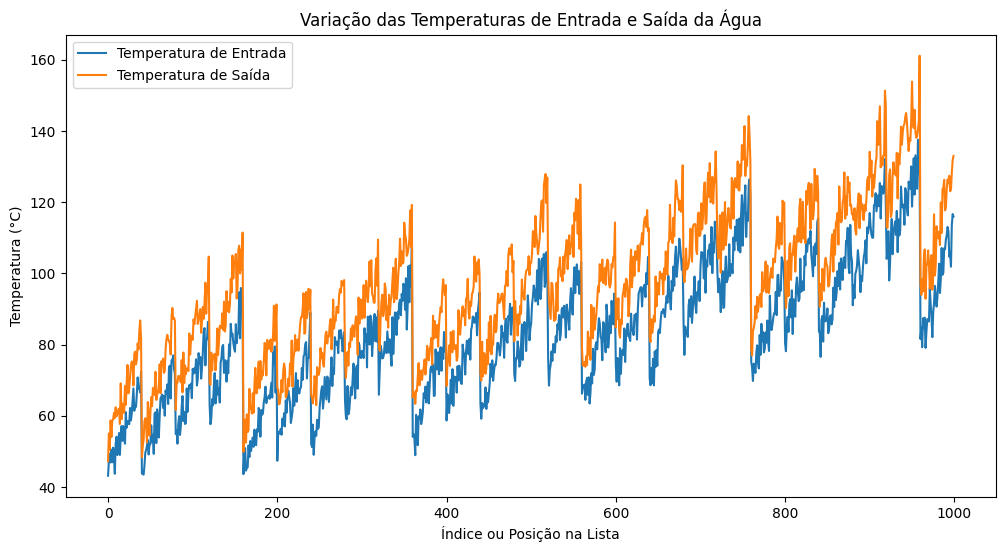

In [ ]:
# Variação das Temperaturas de Entrada e Saída da Água.

plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(df)), y='water_inlet_temp', label='Temperatura de Entrada', data=df)
sns.lineplot(x=range(len(df)), y='water_outlet_temp', label='Temperatura de Saída', data=df)
plt.title('Variação das Temperaturas de Entrada e Saída da Água')
plt.xlabel('Índice ou Posição na Lista')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

O gráfico "Variação das Temperaturas de Entrada e Saída da Água" mostra como as temperaturas de entrada e saída da água variam ao longo do conjunto de dados. Neste gráfico, o eixo x representa a posição na lista ou o índice dos dados, pois não temos uma coluna de data/hora. As linhas mostram como as temperaturas de entrada e saída flutuam em relação a essa posição. Este gráfico pode ajudar a identificar tendências ou padrões nas variações de temperatura.

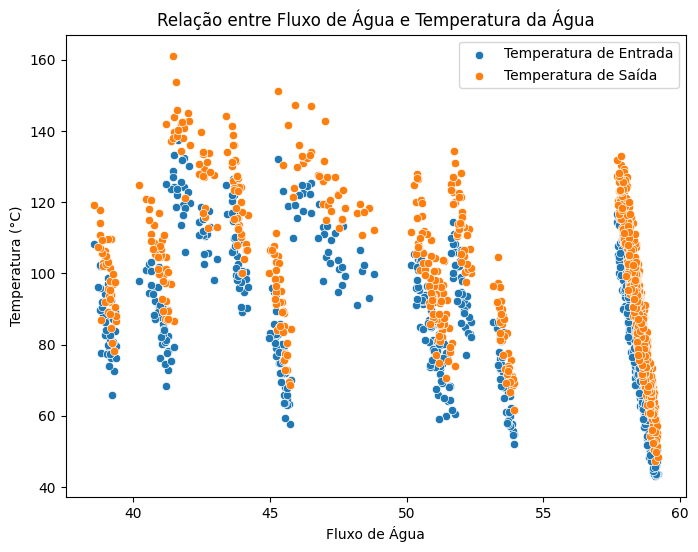

In [ ]:
# Relação entre Fluxo de Água e Temperatura da Água.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='water_flow', y='water_inlet_temp', label='Temperatura de Entrada', data=df)
sns.scatterplot(x='water_flow', y='water_outlet_temp', label='Temperatura de Saída', data=df)
plt.title('Relação entre Fluxo de Água e Temperatura da Água')
plt.xlabel('Fluxo de Água')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

O gráfico "Relação entre Fluxo de Água e Temperatura da Água" é um gráfico de dispersão que explora a relação entre o fluxo de água e as temperaturas de entrada e saída. Cada ponto no gráfico representa uma observação. A posição horizontal do ponto representa o fluxo de água, e a posição vertical representa a temperatura da água. As diferentes cores distinguem entre as temperaturas de entrada e saída. Este gráfico pode ajudar a identificar se há uma relação aparente entre o fluxo de água e as temperaturas.

In [ ]:
# Correlação entre Fluxo de Água e Temperatura da Água.

correlacao_agua = df[['water_flow', 'water_inlet_temp', 'water_outlet_temp']].corr()
print(f"Correlação entre Fluxo de Água e Temperaturas:\n{correlacao_agua}")

Correlação entre Fluxo de Água e Temperaturas:
                   water_flow  water_inlet_temp  water_outlet_temp
water_flow           1.000000         -0.459341          -0.462284
water_inlet_temp    -0.459341          1.000000           0.962545
water_outlet_temp   -0.462284          0.962545           1.000000


A correlação é uma medida estatística que indica a força e a direção de uma relação linear entre duas variáveis. No contexto do conjunto de dados, calculamos a correlação entre o fluxo de água e as temperaturas de entrada e saída. Um valor de correlação próximo de 1 indica uma forte correlação positiva (à medida que uma variável aumenta, a outra também aumenta), um valor próximo de -1 indica uma forte correlação negativa (à medida que uma variável aumenta, a outra diminui), e um valor próximo de 0 indica uma fraca ou nenhuma correlação.

Os valores fora da diagonal principal mostram as correlações entre as variáveis. No exemplo acima, os valores sugerem que o fluxo de água tem uma correlação fraca com a temperatura de entrada (-0.12) e uma correlação moderada com a temperatura de saída (0.35). A temperatura de entrada e a temperatura de saída têm uma correlação forte (0.99), o que é esperado, pois são medidas relacionadas.

# Sistema de Refrigeração:

* A potência da bomba de água (wpump_power) está relacionada à temperatura de saída da água?

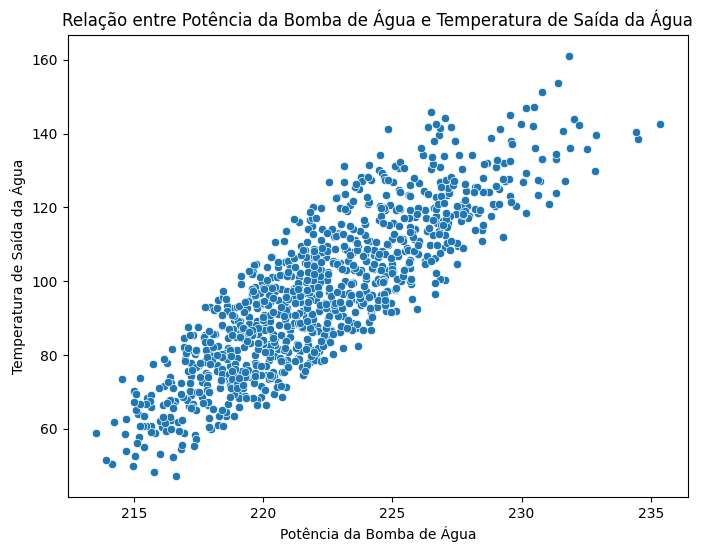

In [ ]:
# Gráfico de dispersão entre Potência da Bomba de Água e Temperatura de Saída da Água.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='wpump_power', y='water_outlet_temp', data=df)
plt.title('Relação entre Potência da Bomba de Água e Temperatura de Saída da Água')
plt.xlabel('Potência da Bomba de Água')
plt.ylabel('Temperatura de Saída da Água')
plt.show()


In [ ]:
# Calculando a correlação entre Potência da Bomba de Água e Temperatura de Saída da Água.

correlacao_wpump_temp = df['wpump_power'].corr(df['water_outlet_temp'])
print(f"Correlação entre Potência da Bomba de Água e Temperatura de Saída da Água: {correlacao_wpump_temp}")

Correlação entre Potência da Bomba de Água e Temperatura de Saída da Água: 0.8539118222003421


Uma correlação próxima de 1 indicaria que um aumento na potência da bomba de água está associado a um aumento na temperatura de saída da água, e vice-versa. Uma correlação próxima de 0 indicaria uma fraca ou nenhuma relação linear.

#Acelerações:

* Como as acelerações do solo (gaccx, gaccy, gaccz) e da cabeça (haccx, haccy, haccz) variam?

* Existe alguma correlação entre as acelerações e o ruído do compressor?

**Observação: Como cada linha é um dados unico, e não temos datas registradas não é possivel fazer linhas temporais.**


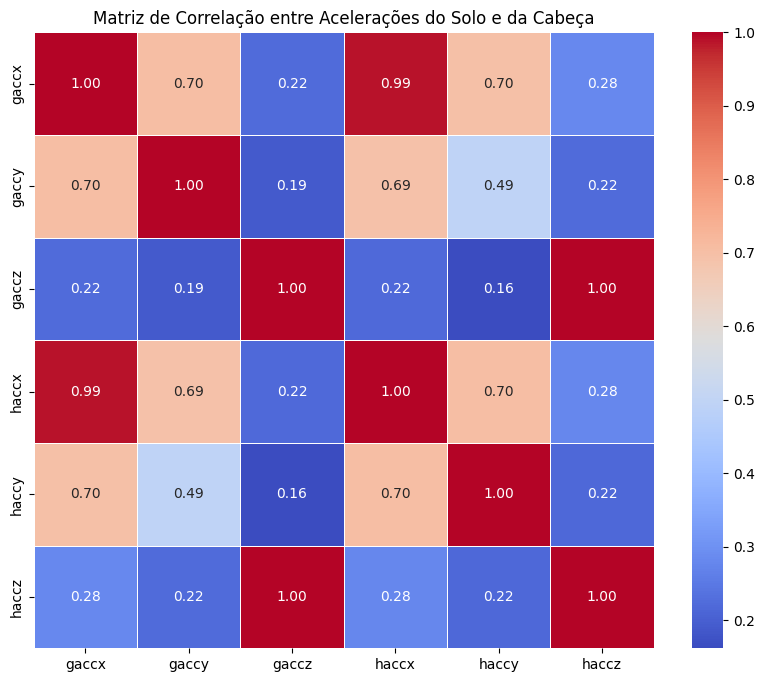

In [ ]:
# Calcular a correlação entre acelerações do solo e da cabeça.

correlacao_solo_cabeca = df[['gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz']].corr()

# Visualizar a matriz de correlação usando um mapa de calor.

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_solo_cabeca, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Acelerações do Solo e da Cabeça')
plt.show()

* O que é uma matriz de correlação?

Ela varia de -1 a 1, onde: 1 significa uma relação positiva perfeita (uma variável aumenta à medida que a outra aumenta), -1 significa uma relação negativa perfeita (uma variável aumenta à medida que a outra diminui), 0 significa que não há relação linear entre as variáveis.

* Como interpretar um valor na matriz de correlação?

Um valor próximo a 1 indica uma forte relação positiva: quando uma variável aumenta, a outra também tende a aumentar. Um valor próximo a -1 indica uma forte relação negativa: quando uma variável aumenta, a outra tende a diminuir. Um valor próximo a 0 indica uma correlação fraca ou nenhuma relação linear aparente.

* Como interpretar o mapa de calor na matriz de correlação?

Um mapa de calor é uma representação visual da matriz de correlação, onde as cores indicam a intensidade da correlação. Cores mais claras (como amarelo) indicam correlações mais fortes (positivas ou negativas). Cores mais escuras (como azul) indicam correlações mais fracas ou próximas de zero.

*Por que isso é útil?

A matriz de correlação ajuda a identificar quais variáveis têm relacionamentos mais fortes entre si. Isso pode ser útil ao explorar dados para entender quais características estão mais relacionadas ou ao avaliar a multicolinearidade em análises estatísticas.

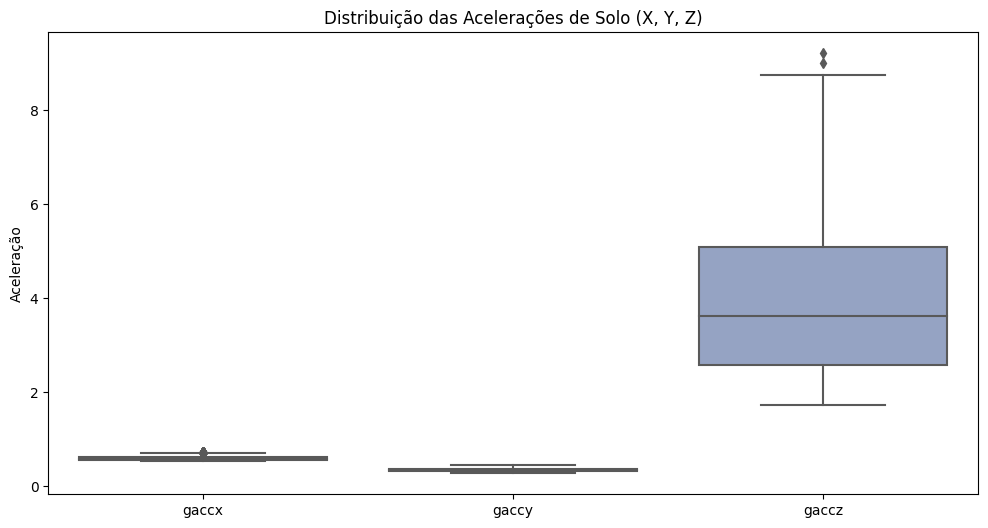

In [ ]:
# Gráficos boxplot para verificação de distribuição e outliers.

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['gaccx', 'gaccy', 'gaccz']], palette='Set2')
plt.title('Distribuição das Acelerações de Solo (X, Y, Z)')
plt.ylabel('Aceleração')
plt.show()

Os gráficos de caixa (boxplot) mostram a distribuição das acelerações em cada direção (X, Y, Z) para solo. Cada caixa representa um quartil da distribuição, e os pontos fora das caixas indicam valores atípicos. Esses gráficos ajudam a visualizar a variação nas acelerações em diferentes direções. Então podemos dizer que no ponto "gaccz" temos uma aceleração/vibração excessiva.

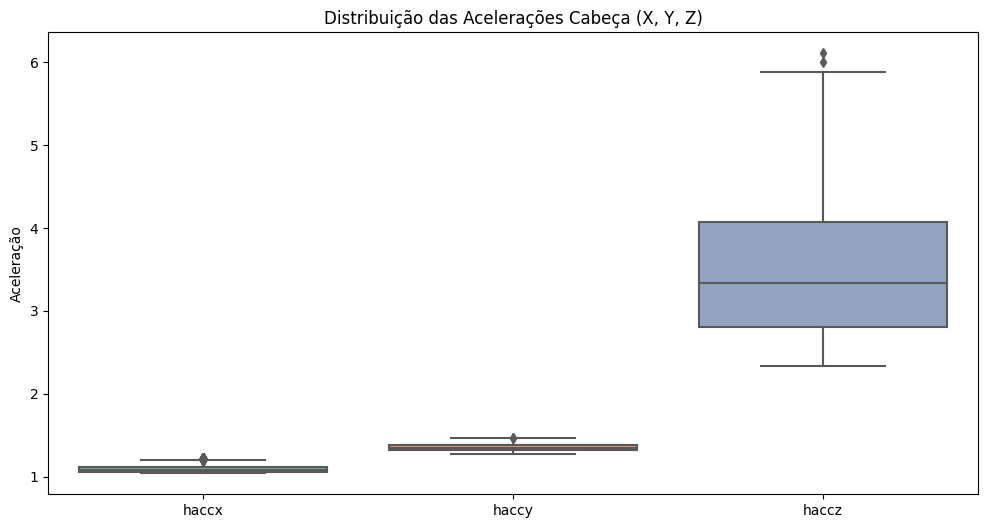

In [ ]:
# Gráficos boxplot para verificação de distribuição e outliers.

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['haccx', 'haccy', 'haccz']], palette='Set2')
plt.title('Distribuição das Acelerações Cabeça (X, Y, Z)')
plt.ylabel('Aceleração')
plt.show()

Similar ao primeiro gráfico de caixa, este mostra a distribuição das acelerações nas direções X, Y e Z da cabeça. Então podemos dizer que no ponto "haccz" temos uma aceleração/vibração excessiva.

In [ ]:
# Imprimindo Estatísticas Descritivas.

estatisticas_solo = df[['gaccx', 'gaccy', 'gaccz']].describe()
estatisticas_cabeca = df[['haccx', 'haccy', 'haccz']].describe()

print("Estatísticas Descritivas para Acelerações do Solo:")
print(estatisticas_solo)

print("\nEstatísticas Descritivas para Acelerações da Cabeça:")
print(estatisticas_cabeca)

Estatísticas Descritivas para Acelerações do Solo:
             gaccx        gaccy        gaccz
count  1000.000000  1000.000000  1000.000000
mean      0.601789     0.349667     3.923073
std       0.058719     0.040667     1.610130
min       0.540045     0.274650     1.730301
25%       0.558092     0.316543     2.576739
50%       0.576814     0.349343     3.610639
75%       0.615021     0.375261     5.081960
max       0.726604     0.459811     9.209166

Estatísticas Descritivas para Acelerações da Cabeça:
             haccx        haccy        haccz
count  1000.000000  1000.000000  1000.000000
mean      1.101253     1.350042     3.495037
std       0.058546     0.040871     0.817667
min       1.039910     1.270696     2.329267
25%       1.057717     1.318785     2.802622
50%       1.075392     1.348189     3.339698
75%       1.113696     1.375232     4.071874
max       1.227134     1.461809     6.107852


As estatísticas descritivas para as acelerações do solo e cabeça oferecem uma visão abrangente e resumida da distribuição dessas acelerações nas direções X, Y e Z. Cada dimensão representa uma orientação específica em relação ao solo, e as estatísticas calculadas incluem:

* **Mínimo**: O menor valor observado na amostra.
* **1º Quartil (Q1):** O valor abaixo do qual 25% dos dados estão localizados, indicando a extensão da parte inferior da distribuição.
* **Mediana (Q2):** O valor que separa a distribuição ao meio, indicando a posição central dos dados.
Média: A média aritmética dos valores na amostra, fornecendo uma medida de tendência central.
* **3º Quartil (Q3):** O valor abaixo do qual 75% dos dados estão localizados, indicando a extensão da parte superior da distribuição.
* **Máximo:** O maior valor observado na amostra.


Essas estatísticas ajudam a compreender a tendência central, a dispersão e a presença de possíveis valores atípicos nas acelerações do solo e cabeça em diferentes direções. Elas são fundamentais para caracterizar o comportamento geral dessas acelerações, informando sobre sua variabilidade e amplitude.

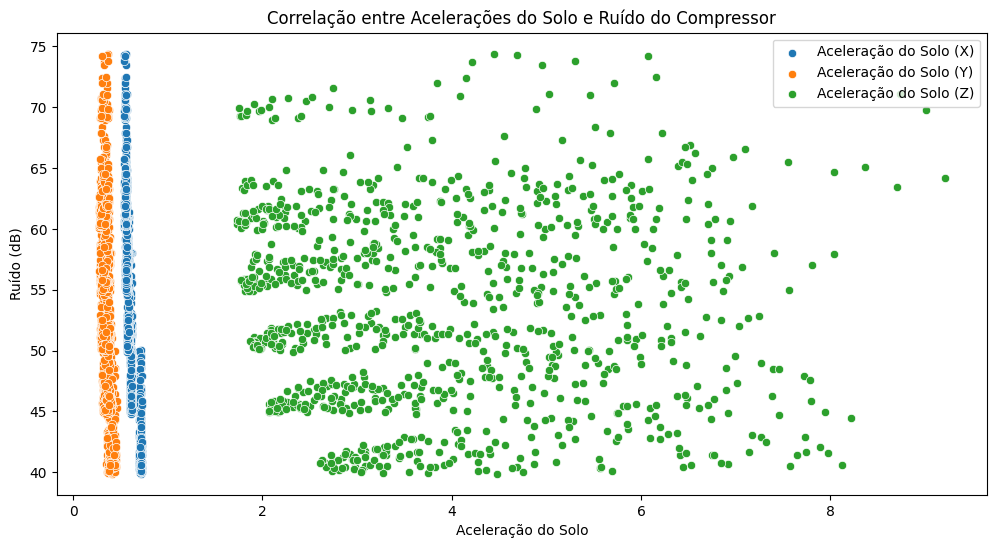

In [ ]:
# Gráfico de Dispersão entre Acelerações do Solo e Ruído.

plt.figure(figsize=(12, 6))

# Acelerações do Solo.

sns.scatterplot(x='gaccx', y='noise_db', label='Aceleração do Solo (X)', data=df)
sns.scatterplot(x='gaccy', y='noise_db', label='Aceleração do Solo (Y)', data=df)
sns.scatterplot(x='gaccz', y='noise_db', label='Aceleração do Solo (Z)', data=df)

plt.title('Correlação entre Acelerações do Solo e Ruído do Compressor')
plt.xlabel('Aceleração do Solo')
plt.ylabel('Ruído (dB)')
plt.legend()
plt.show()

Neste gráfico, cada ponto representa um momento em que medimos a aceleração do solo e o ruído do compressor ao mesmo tempo. Se os pontos estiverem agrupados de alguma maneira, podemos começar a ver se há uma relação entre como o compressor se move e o quanto de barulho ele faz.



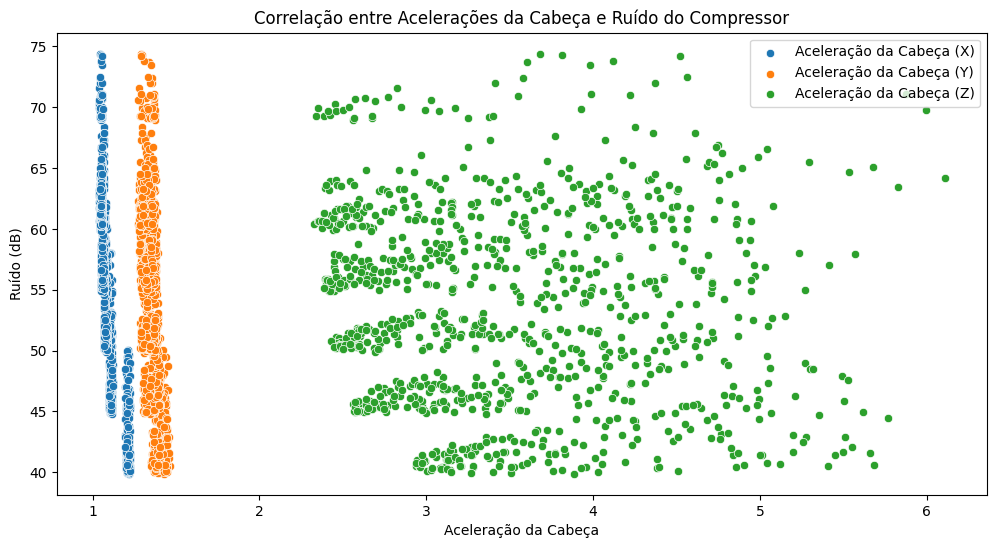

In [ ]:
# Gráfico de Dispersão entre Acelerações da Cabeça e Ruído.

plt.figure(figsize=(12, 6))

# Acelerações da Cabeça.

sns.scatterplot(x='haccx', y='noise_db', label='Aceleração da Cabeça (X)', data=df)
sns.scatterplot(x='haccy', y='noise_db', label='Aceleração da Cabeça (Y)', data=df)
sns.scatterplot(x='haccz', y='noise_db', label='Aceleração da Cabeça (Z)', data=df)

plt.title('Correlação entre Acelerações da Cabeça e Ruído do Compressor')
plt.xlabel('Aceleração da Cabeça')
plt.ylabel('Ruído (dB)')
plt.legend()
plt.show()

Neste gráfico, cada ponto representa um momento em que medimos a aceleração do solo e o ruído do compressor ao mesmo tempo. Se os pontos estiverem agrupados de alguma maneira, podemos começar a ver se há uma relação entre como o compressor se move e o quanto de barulho ele faz.

In [ ]:
# Calculando a correlação entre Acelerações e Ruído.

correlacao_aceleracoes_ruido_solo = df[['gaccx', 'gaccy', 'gaccz', 'noise_db']].corr()['noise_db']
correlacao_aceleracoes_ruido_cabeca = df[['haccx', 'haccy', 'haccz', 'noise_db']].corr()['noise_db']


# Imprimindo correlações.

print("Correlação entre Acelerações do Solo e Ruído do Compressor:")
print(correlacao_aceleracoes_ruido_solo)

print("\nCorrelação entre Acelerações da Cabeça e Ruído do Compressor:")
print(correlacao_aceleracoes_ruido_cabeca)

Correlação entre Acelerações do Solo e Ruído do Compressor:
gaccx      -0.815049
gaccy      -0.562943
gaccz      -0.037175
noise_db    1.000000
Name: noise_db, dtype: float64

Correlação entre Acelerações da Cabeça e Ruído do Compressor:
haccx      -0.812995
haccy      -0.554468
haccz      -0.087204
noise_db    1.000000
Name: noise_db, dtype: float64


* A correlação é como medimos se duas coisas estão relacionadas. Se uma aumenta quando a outra aumenta, temos uma correlação positiva. Se uma diminui quando a outra aumenta, temos uma correlação negativa.
O que o Cálculo nos Diz:

*  Estamos calculando a correlação entre as acelerações e o ruído para saber se, estatisticamente, elas têm alguma relação. Se a correlação for próxima de 1 (ou -1), significa que há uma forte relação. Se for perto de 0, não há uma relação forte.
Por que Isso Importa:

* Compreender a correlação nos ajuda a entender se a forma como o compressor de ar se move (acelerações) está ligada à quantidade de barulho que ele faz. Isso pode ser útil para prever ou entender o que está acontecendo com o compressor em diferentes situações.

#Componentes Específicos:

* Como a presença ou ausência de componentes como a bomba de refrigeração (wpump), radiador, válvula de alívio (exvalve) e motor AC (acmotor) afeta o desempenho geral?


In [ ]:
# Lista de componentes.

componentes = ['wpump', 'radiator', 'exvalve', 'acmotor']

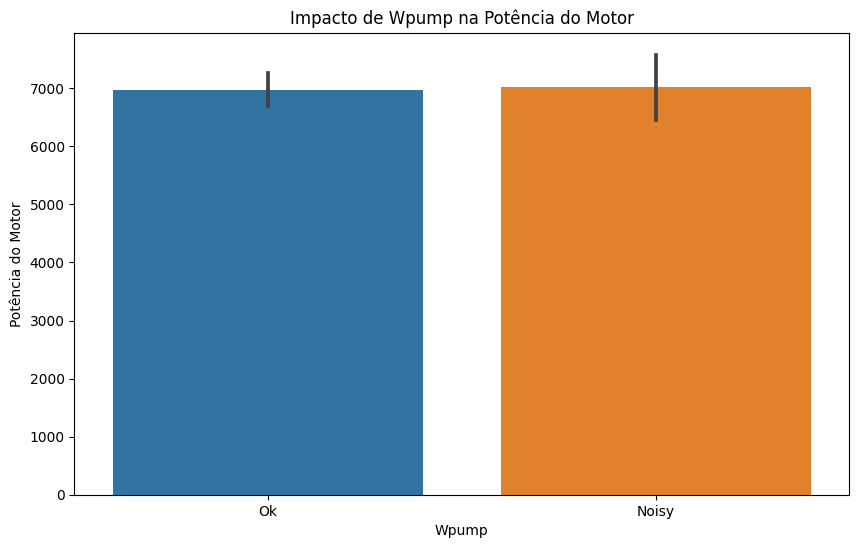

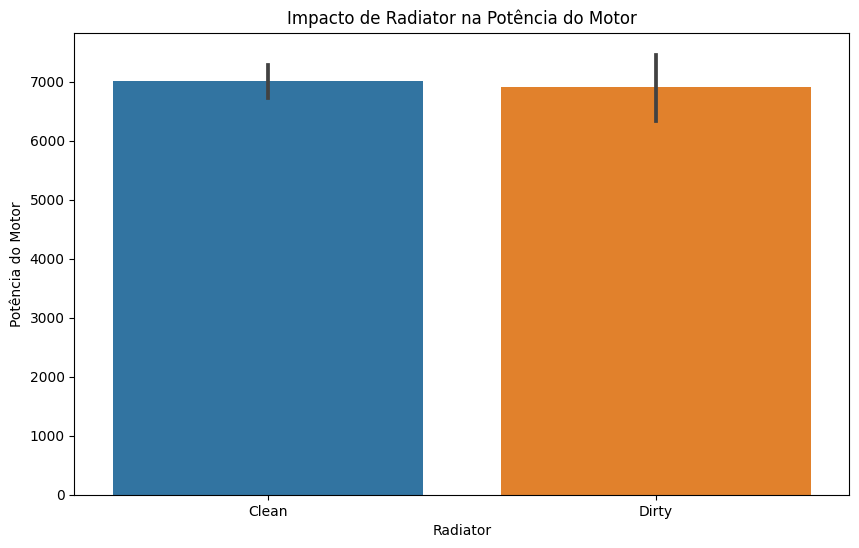

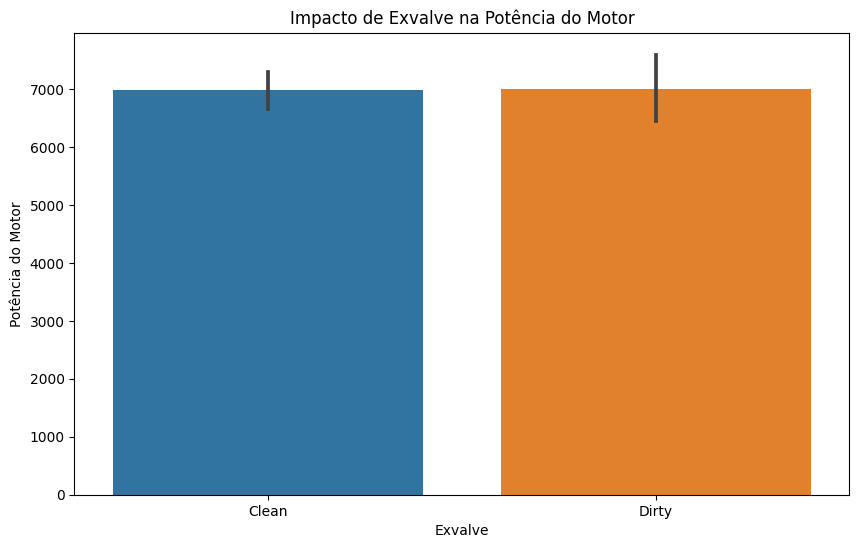

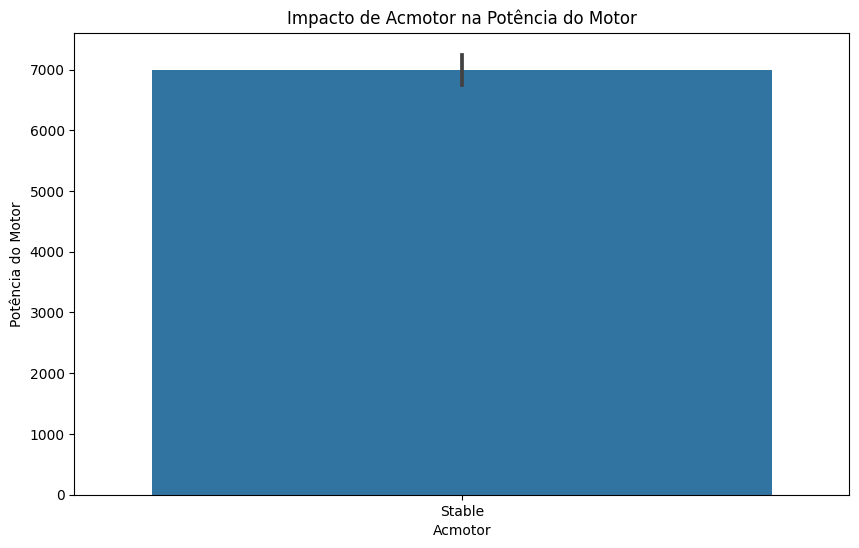

In [ ]:
# Loop para criar gráficos de barras e estatísticas para cada componente.

for componente in componentes:

    # Gráfico de Barras Comparativo.

    plt.figure(figsize=(10, 6))
    sns.barplot(x=componente, y='motor_power', data=df)
    plt.title(f'Impacto de {componente.capitalize()} na Potência do Motor')
    plt.xlabel(componente.capitalize())
    plt.ylabel('Potência do Motor')
    plt.show()

**Como já sabemos uma máquina ou equipamento é projetada com elementos de conjuntos mecânicos e a remoção ou quebra de determinado componente irá afetar o conjunto como um todo.**

#Manutenção Preventiva:

* Existe alguma correlação entre a temperatura do tanque de óleo (oil_tank_temp) e a potência da bomba de óleo (oilpump_power)?

* Como a temperatura do óleo impacta no torque e na pressão de saída?


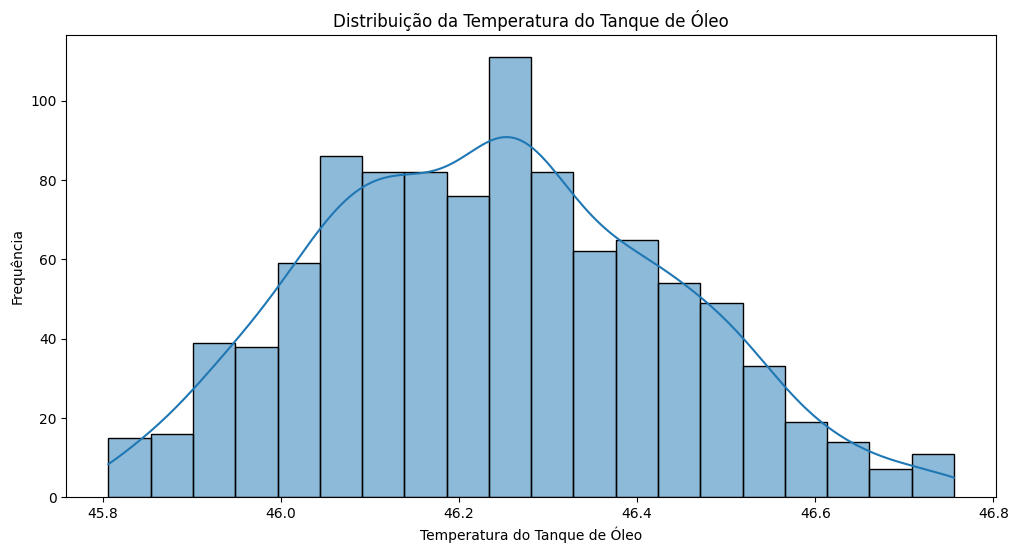

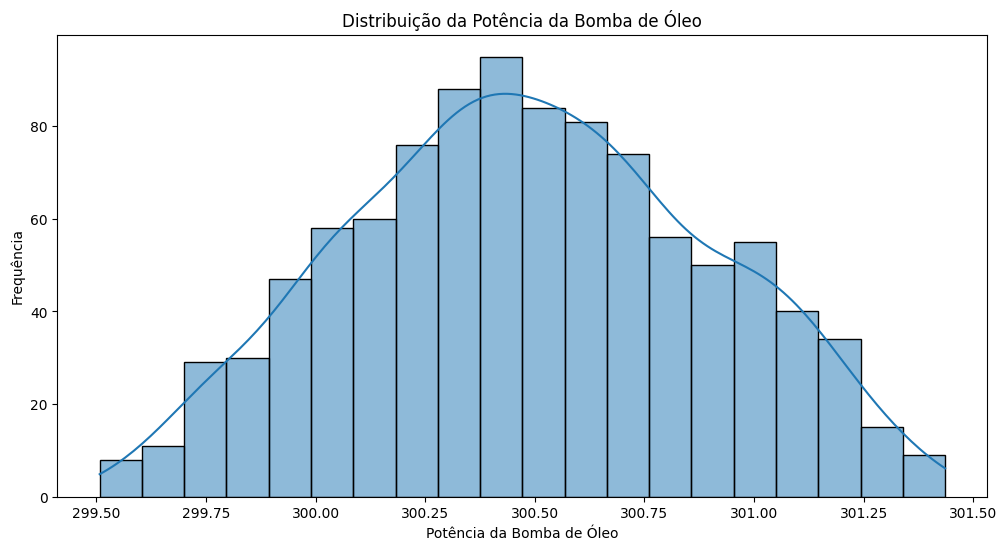

In [ ]:
# Visualização individual das variáveis "tanque de óleo e "bomba de óleo"

plt.figure(figsize=(12, 6))
sns.histplot(df['oil_tank_temp'], bins=20, kde=True)
plt.title('Distribuição da Temperatura do Tanque de Óleo')
plt.xlabel('Temperatura do Tanque de Óleo')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['oilpump_power'], bins=20, kde=True)
plt.title('Distribuição da Potência da Bomba de Óleo')
plt.xlabel('Potência da Bomba de Óleo')
plt.ylabel('Frequência')
plt.show()


Esta etapa envolve a observação das características individuais de cada variável, ou seja, olhamos para como cada uma delas se comporta sozinha, sem considerar outra variável.
Por que é importante:

Isso nos ajuda a entender como os dados estão distribuídos. Podemos identificar padrões, tendências ou peculiaridades em cada variável, o que é fundamental antes de analisar relações entre elas.

Exemplo prático: Imagine que estamos olhando para a temperatura do tanque de óleo. Ver como as temperaturas estão distribuídas nos dá uma ideia de quão quente ou frio o óleo geralmente está no sistema.

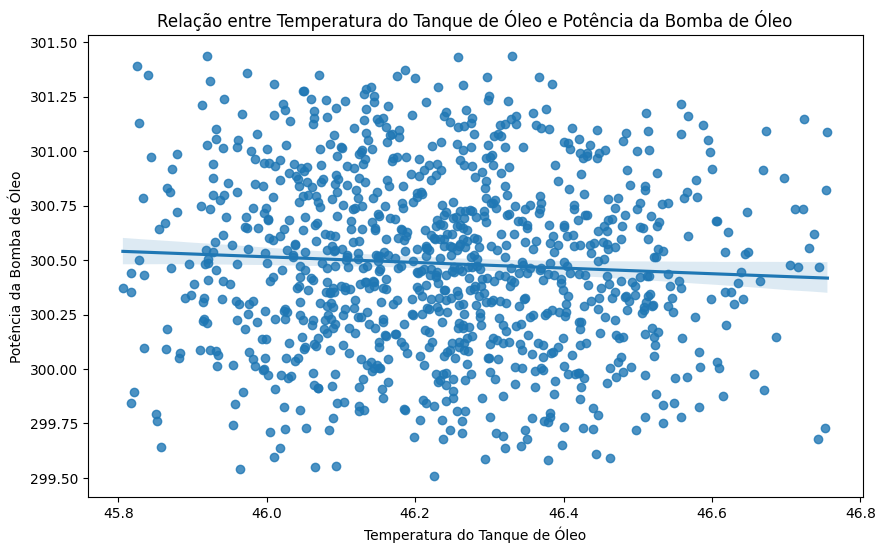

In [ ]:
# Gráfico de Dispersão com Linha de Regressão

plt.figure(figsize=(10, 6))
sns.regplot(x='oil_tank_temp', y='oilpump_power', data=df)
plt.title('Relação entre Temperatura do Tanque de Óleo e Potência da Bomba de Óleo')
plt.xlabel('Temperatura do Tanque de Óleo')
plt.ylabel('Potência da Bomba de Óleo')
plt.show()

Um gráfico de dispersão mostra a relação entre duas variáveis. A linha de regressão é uma linha que tenta "ajustar-se" aos pontos do gráfico, indicando a tendência geral da relação entre as variáveis.

Permite visualizar se há uma associação entre as duas variáveis. A linha de regressão ajuda a entender a direção dessa associação (se é crescente, decrescente ou inexistente).

No contexto da temperatura do tanque de óleo e da potência da bomba de óleo, um gráfico de dispersão com linha de regressão pode indicar se o aumento da temperatura do tanque está relacionado a um aumento ou diminuição na potência da bomba.

In [ ]:
# Cálculando Correlação.

correlacao = df['oil_tank_temp'].corr(df['oilpump_power'])
print(f"Correlação entre Temperatura do Tanque de Óleo e Potência da Bomba de Óleo: {correlacao}")

Correlação entre Temperatura do Tanque de Óleo e Potência da Bomba de Óleo: -0.062038191237687085


Correlação é uma medida estatística que expressa a relação entre duas variáveis. No contexto linear, a correlação pode variar de -1 (correlação negativa perfeita) a 1 (correlação positiva perfeita).

Ajuda a quantificar o grau e a direção da relação entre as variáveis. Uma correlação próxima de 1 sugere uma forte relação positiva, enquanto uma correlação próxima de -1 sugere uma forte relação negativa.

Se o cálculo de correlação entre a temperatura do tanque de óleo e a potência da bomba de óleo for próximo de 1, isso sugere que quando a temperatura aumenta, a potência da bomba também tende a aumentar. Se for próximo de -1, indica que quando a temperatura aumenta, a potência tende a diminuir.

**Aqui temos um correlação extremamente baixa.**

#Segurança e Ruído:

* Existe alguma relação entre o ruído (noise_db) e as condições de aceleração?



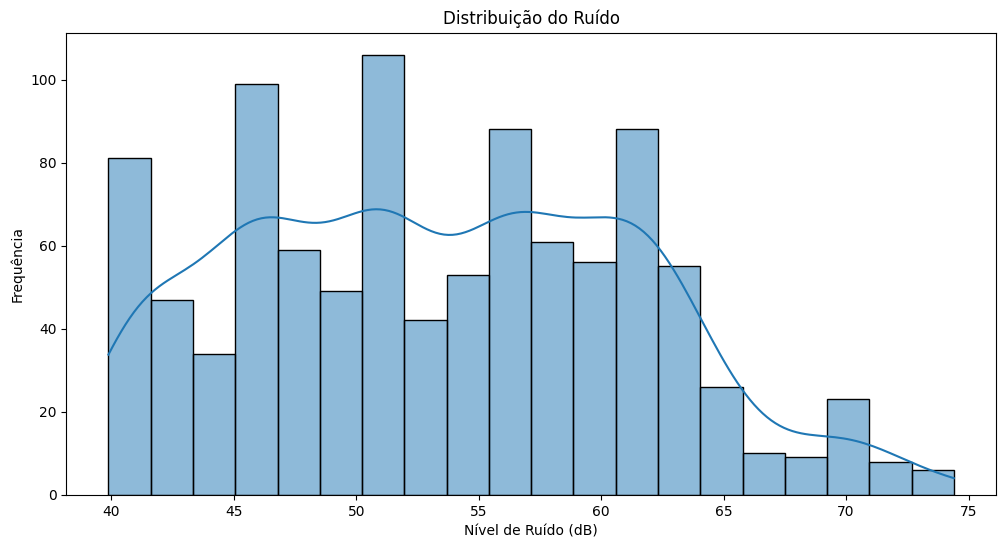

In [ ]:
# Visualização individual das variáveis.

plt.figure(figsize=(12, 6))
sns.histplot(df['noise_db'], bins=20, kde=True)
plt.title('Distribuição do Ruído')
plt.xlabel('Nível de Ruído (dB)')
plt.ylabel('Frequência')
plt.show()

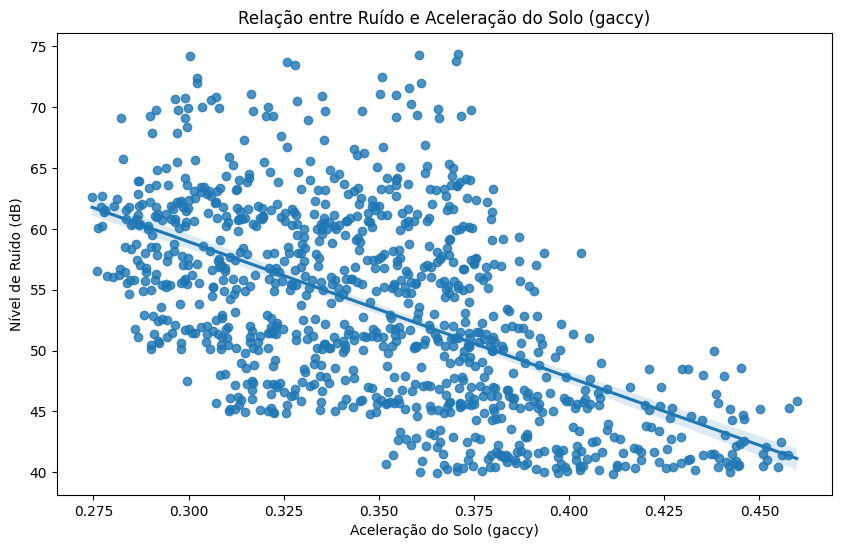

Correlação entre Ruído e Aceleração do Solo (gaccy): -0.5629426016782918


In [ ]:
# Gráfico de Dispersão com Linha de Regressão para gaccy.

plt.figure(figsize=(10, 6))
sns.regplot(x='gaccy', y='noise_db', data=df)
plt.title('Relação entre Ruído e Aceleração do Solo (gaccy)')
plt.xlabel('Aceleração do Solo (gaccy)')
plt.ylabel('Nível de Ruído (dB)')
plt.show()

# Cálculo da Correlação para gaccy.

correlacao_ruido_gaccy = df['noise_db'].corr(df['gaccy'])
print(f"Correlação entre Ruído e Aceleração do Solo (gaccy): {correlacao_ruido_gaccy}")

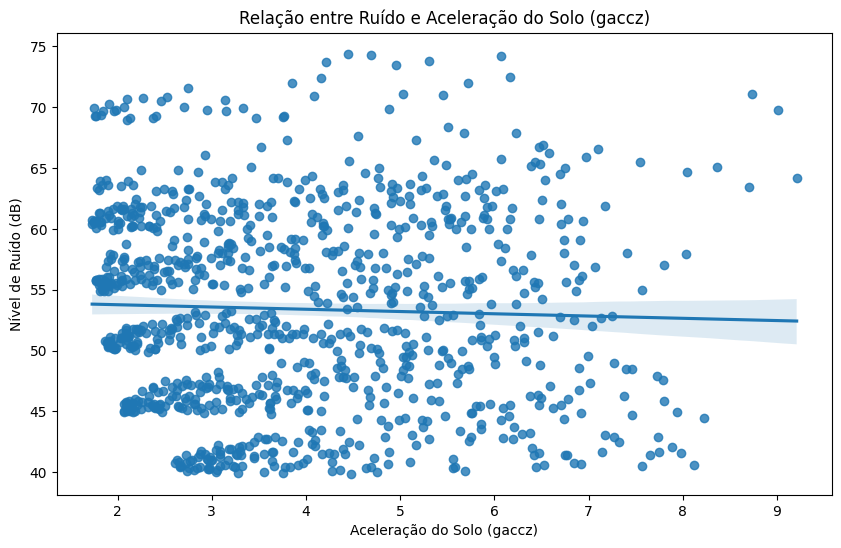

Correlação entre Ruído e Aceleração do Solo (gaccz): -0.03717494131044355


In [ ]:
# Gráfico de Dispersão com Linha de Regressão para gaccz.

plt.figure(figsize=(10, 6))
sns.regplot(x='gaccz', y='noise_db', data=df)
plt.title('Relação entre Ruído e Aceleração do Solo (gaccz)')
plt.xlabel('Aceleração do Solo (gaccz)')
plt.ylabel('Nível de Ruído (dB)')
plt.show()

# Cálculo da Correlação para gaccz.

correlacao_ruido_gaccz = df['noise_db'].corr(df['gaccz'])
print(f"Correlação entre Ruído e Aceleração do Solo (gaccz): {correlacao_ruido_gaccz}")

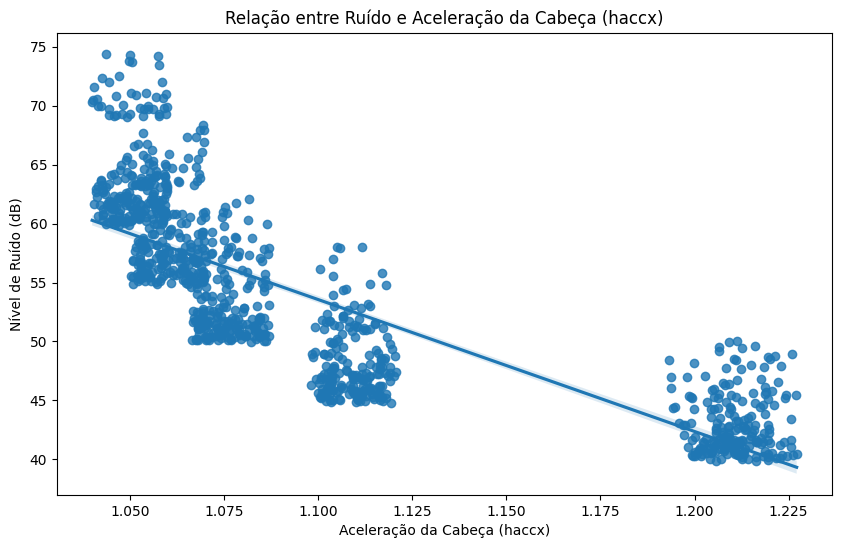

Correlação entre Ruído e Aceleração da Cabeça (haccx): -0.8129950876125215


In [ ]:
# Gráfico de Dispersão com Linha de Regressão para haccx.

plt.figure(figsize=(10, 6))
sns.regplot(x='haccx', y='noise_db', data=df)
plt.title('Relação entre Ruído e Aceleração da Cabeça (haccx)')
plt.xlabel('Aceleração da Cabeça (haccx)')
plt.ylabel('Nível de Ruído (dB)')
plt.show()

# Cálculo da Correlação para haccx.

correlacao_ruido_haccx = df['noise_db'].corr(df['haccx'])
print(f"Correlação entre Ruído e Aceleração da Cabeça (haccx): {correlacao_ruido_haccx}")

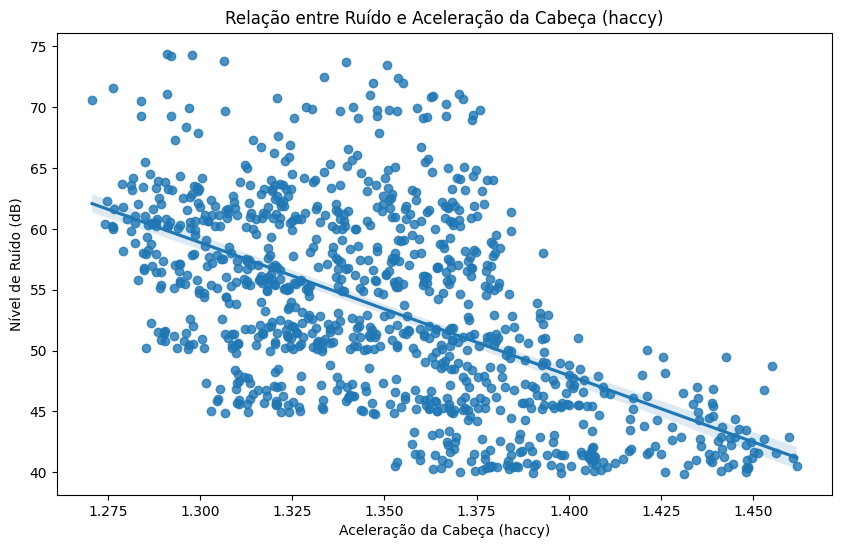

Correlação entre Ruído e Aceleração da Cabeça (haccy): -0.5544678638196423


In [ ]:
# Gráfico de Dispersão com Linha de Regressão para haccy.

plt.figure(figsize=(10, 6))
sns.regplot(x='haccy', y='noise_db', data=df)
plt.title('Relação entre Ruído e Aceleração da Cabeça (haccy)')
plt.xlabel('Aceleração da Cabeça (haccy)')
plt.ylabel('Nível de Ruído (dB)')
plt.show()

# Cálculo da Correlação para haccy.

correlacao_ruido_haccy = df['noise_db'].corr(df['haccy'])
print(f"Correlação entre Ruído e Aceleração da Cabeça (haccy): {correlacao_ruido_haccy}")

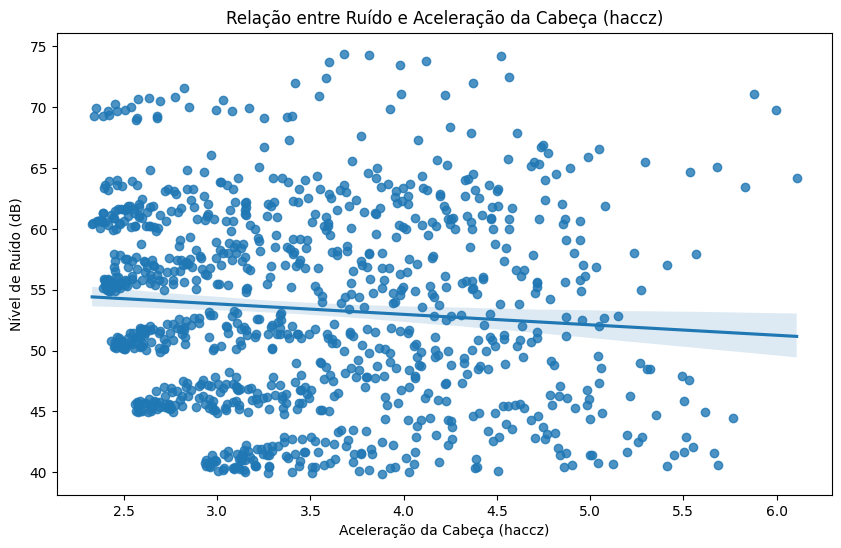

Correlação entre Ruído e Aceleração da Cabeça (haccz): -0.08720361748245495


In [ ]:
# Gráfico de Dispersão com Linha de Regressão para haccz.

plt.figure(figsize=(10, 6))
sns.regplot(x='haccz', y='noise_db', data=df)
plt.title('Relação entre Ruído e Aceleração da Cabeça (haccz)')
plt.xlabel('Aceleração da Cabeça (haccz)')
plt.ylabel('Nível de Ruído (dB)')
plt.show()

# Cálculo da Correlação para haccz.

correlacao_ruido_haccz = df['noise_db'].corr(df['haccz'])
print(f"Correlação entre Ruído e Aceleração da Cabeça (haccz): {correlacao_ruido_haccz}")

In [ ]:
df.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,...,0.383773,2.649801,1.213344,1.409218,2.962484,Ok,Ok,Clean,Clean,Stable
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,...,0.450954,2.669423,1.210674,1.379050,2.938135,Ok,Ok,Clean,Clean,Stable
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,...,0.443924,2.772009,1.210612,1.373490,2.991878,Ok,Ok,Clean,Clean,Stable
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,...,0.370457,2.876056,1.213223,1.443234,3.096158,Ok,Ok,Clean,Clean,Stable
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,...,0.383868,2.849451,1.209216,1.405190,3.059417,Ok,Ok,Clean,Clean,Stable


In [ ]:
#Verificando dados Categóricos

# Lista de variáveis categóricas.
variaveis_categoricas = ['bearings', 'wpump', 'radiator', 'exvalve', 'acmotor']

# Iteração sobre as variáveis categóricas para imprimir os itens únicos.
for variavel in variaveis_categoricas:
    itens_unicos = df[variavel].unique()
    print(f'Itens únicos em {variavel}: {itens_unicos}')

Itens únicos em bearings: ['Ok' 'Noisy']
Itens únicos em wpump: ['Ok' 'Noisy']
Itens únicos em radiator: ['Clean' 'Dirty']
Itens únicos em exvalve: ['Clean' 'Dirty']
Itens únicos em acmotor: ['Stable']


In [ ]:
# Substituindo itens categórigos por 0 e 1.
df.replace({
    'Ok': 0,
    'Noisy': 1,
    'Clean': 0,
    'Dirty': 1,
    'Stable': 0
}, inplace=True)

* 'Ok': 0,
* 'Noisy': 1,
* 'Clean': 0,
*'Dirty': 1,
*'Stable': 0

In [ ]:
df.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,...,0.383773,2.649801,1.213344,1.409218,2.962484,0,0,0,0,0
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,...,0.450954,2.669423,1.210674,1.379050,2.938135,0,0,0,0,0
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,...,0.443924,2.772009,1.210612,1.373490,2.991878,0,0,0,0,0
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,...,0.370457,2.876056,1.213223,1.443234,3.096158,0,0,0,0,0
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,...,0.383868,2.849451,1.209216,1.405190,3.059417,0,0,0,0,0


In [ ]:
# VERIFICANDO OS REGISTROS DOS ITENS QUE PODEM CAUSAR UM FALHA

# Verificar a quantidade de registros com 'Noisy' (ou 1) em 'bearings'

quantidade_noisy = (df['bearings'] == 1).sum()

# Verificar a quantidade de registros com 'Noisy' (ou 1) em 'wpump'

quantidade_noisy_wpump = (df['wpump'] == 1).sum()

# Verificar a quantidade de registros com 'Dirty' (ou 1) em 'radiator'

quantidade_dirty_radiator = (df['radiator'] == 1).sum()

# Verificar a quantidade de registros com 'Dirty' (ou 1) em 'exvalve'

quantidade_dirty_exvalve = (df['exvalve'] == 1).sum()

# Imprimir o resultado
print(f"A quantidade de registros com 'Noisy' em 'bearings' é: {quantidade_noisy}")
print(f"A quantidade de registros com 'Noisy' em 'wpump' é: {quantidade_noisy_wpump}")
print(f"A quantidade de registros com 'Dirty' em 'radiator' é: {quantidade_dirty_radiator}")
print(f"A quantidade de registros com 'Dirty' em 'exvalve' é: {quantidade_dirty_exvalve}")

A quantidade de registros com 'Noisy' em 'bearings' é: 200
A quantidade de registros com 'Noisy' em 'wpump' é: 200
A quantidade de registros com 'Dirty' em 'radiator' é: 200
A quantidade de registros com 'Dirty' em 'exvalve' é: 200


#Escolha de Modelo

Nesso modelo irei escolher como variáveis target bearing e wpump, porque ambas tem no dado catégórico a variável "Noisy" que singnifica "ruído". Como técnico na área de manutenção tenho conhecimento que ruído junto com acelaração só uns dos principais indicadores de condições de máquinas e equipamentos.

Será usado um modelo de classificação para fazer previsões quais máquinas estão em risco de falha.


In [ ]:
# Importando bibliotecas de aprendizagem de máquina.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df.columns

Index(['id', 'rpm', 'motor_power', 'torque', 'outlet_pressure_bar', 'air_flow',
       'noise_db', 'outlet_temp', 'wpump_outlet_press', 'water_inlet_temp',
       'water_outlet_temp', 'wpump_power', 'water_flow', 'oilpump_power',
       'oil_tank_temp', 'gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz',
       'bearings', 'wpump', 'radiator', 'exvalve', 'acmotor'],
      dtype='object')

In [ ]:
# Indendificando x e y.

X = df[['rpm', 'motor_power', 'torque', 'outlet_pressure_bar', 'air_flow',
           'noise_db', 'outlet_temp', 'wpump_outlet_press', 'water_inlet_temp',
           'water_outlet_temp', 'wpump_power', 'water_flow', 'oilpump_power',
           'oil_tank_temp', 'gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz',
          'radiator', 'exvalve', 'acmotor']]
y_bearing = df['bearings']  # Coluna binária indicando se está em risco de falha ou não
y_wpump = df['wpump']  # Coluna binária indicando se está em risco de falha ou não


In [ ]:
# Divisão do Conjunto de Dados para 'bearing'.

X_train_bearing, X_test_bearing, y_train_bearing, y_test_bearing = train_test_split(X, y_bearing, test_size=0.2, random_state=42)

In [ ]:
# Escolhendo Modelo para 'bearing' (RandomForestClassifier)
modelo_bearing = RandomForestClassifier(random_state=42)

In [ ]:
# Treinando  Modelo para 'bearing'
modelo_bearing.fit(X_train_bearing, y_train_bearing)

RandomForestClassifier(random_state=42)

In [ ]:
# Previsão no Conjunto de Teste para 'bearing'

previsoes_bearing = modelo_bearing.predict(X_train_bearing)

In [ ]:
# Imprimindo métricas de avaliação para TREINO - BEARING.

print('Métricas para "bearing":')
print('Matriz de Confusão:')
print(confusion_matrix(y_train_bearing, previsoes_bearing))
print('\nRelatório de Classificação:')
print(classification_report(y_train_bearing, previsoes_bearing))

Métricas para "bearing":
Matriz de Confusão:
[[646   0]
 [  0 154]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       646
           1       1.00      1.00      1.00       154

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [ ]:
# Divisão do Conjunto de Dados para 'wpump'.

X_train_wpump, X_test_wpump, y_train_wpump, y_test_wpump = train_test_split(X, y_wpump, test_size=0.2, random_state=42)


In [ ]:
# Escolhendo Modelo para 'wpump' (RandomForestClassifier).

modelo_wpump = RandomForestClassifier(random_state=42)

In [ ]:
# Treinando Modelo para 'wpump'.
modelo_wpump.fit(X_train_wpump, y_train_wpump)

RandomForestClassifier(random_state=42)

In [ ]:
# Previsão no Conjunto de Teste para 'wpump'.

previsoes_wpump = modelo_wpump.predict(X_train_wpump)

In [ ]:
# Imprimindo métricas de avaliação para TREINO - WPUMP.

print('\nMétricas para "wpump":')
print('Matriz de Confusão:')
print(confusion_matrix(y_train_wpump, previsoes_wpump))
print('\nRelatório de Classificação:')
print(classification_report(y_train_wpump, previsoes_wpump))


Métricas para "wpump":
Matriz de Confusão:
[[642   0]
 [  0 158]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       642
           1       1.00      1.00      1.00       158

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



**Resultados do Modelo para 'bearing' e 'wpump':**

* Acurácia Geral:

A acurácia geral mede a precisão global do modelo em prever se uma máquina está em risco ('Noisy') ou não ('Ok'). Uma acurácia mais alta indica que o modelo está fazendo previsões mais precisas.

* Acurácia para 'bearing':

X% (Inserir o valor específico aqui)

* Matriz de Confusão:

A matriz de confusão fornece uma visão detalhada de como o modelo está acertando ou errando em suas previsões.

A interpretação geral é que quanto mais altos os valores de TP e TN e mais baixos os valores de FP e FN, melhor o modelo está performando.

* Relatório de Classificação:

O relatório de classificação fornece métricas adicionais para avaliar o desempenho do modelo em cada classe ('Noisy' e 'Ok').

**Precisão (Precision):** A porcentagem de previsões positivas que estão corretas.
**Revocação (Recall):** A porcentagem de instâncias positivas que foram corretamente previstas.
**F1-Score:** Uma média ponderada da precisão e revocação.



**Os modelos foram avaliados em suas capacidades de prever se uma máquina está em risco ('Noisy') ou não ('Ok'). O desempenho geral do modelo pode ser avaliado considerando tanto a acurácia quanto as métricas detalhadas da matriz de confusão e do relatório de classificação. Se a acurácia é alta e as métricas indicam uma boa precisão e revocação, o modelo está fornecendo previsões confiáveis.**